# 4 Preprocessing and Training Data<a id='4_Preprocessing_and_Training_Data'></a>

## 4.1 Contents<a id='4.1_Contents'></a>
* [4 Preprocessing and Training Data](#4_Preprocessing_and_Training_Data)
  * [4.1 Contents](#4.1_Contents)
  * [4.2 Introduction](#4.2_Introduction)
  * [4.3 Imports](#4.3_Imports)
  * [4.4 Load The Data](#4.4_Load_The_Data)  
    * [4.4.1 Data](#4.4.1_data)
  * [4.5 Preprocess The Data](#4.5_Preprocess_The_Data)
    * [4.5.1 Scaling](#4.5.1_Scaling)
    * [4.5.2 Null Values and Outliers](#4.5.2_Null_Values_and_Outliers)
    * [4.5.3 Predicted Variable Categorize](#4.5.3_Predicted_Variable_Categorize)
  * [4.6 Data Training](#4.6_Data_Training) 
     * [4.6.1 Split Data and Initialize Model](#4.6.1_Split_Model)
     * [4.6.2 Fit Model](#4.6.2_Fit_Model)
     * [4.6.3 Look at Preliminary Model](#4.6.3_Look_at_Preliminary_Model)
  * [4.7 Summary](#3.7_Summary)


## 4.2 Introduction<a id='4.2_Introduction'></a>

Herein, we will complete any preprocessing required and then split/train the data.  

## 4.3 Imports<a id='4.3_Imports'></a>

In [170]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## 4.4 Load the Data<a id='4.4_Load_The_Data'></a>

### 4.4.1 Data<a id='4.4.1_data'></a>

In [218]:
df = pd.read_csv('/Users/gryka/Documents/GitHub/SBwork/Capstone2/Data/data_EDA.csv')
df.head()

,country,adult_anemia_2016,adult_blood_pressure_2015,adult_sodium_2017,basic_sanitation_2017,basic_water_2017,fruit_veg_availability_2013,government_revenue_2020,limited_sanitation_2017,limited_water_2017,...,unimproved_sanitation_2017,unimproved_water_2017,workplaces_percent_change_from_baseline,parkinson_disease_deaths,dementia_deaths,cancers_deaths,economic_rating,macroeconomic_rating,cases_per_cap,day_number
0,S. Korea,23.700000,10.980,5.203333,0.10,1.57,747.25,38.14,0.00,0.0,...,0.00,0.21,-6.486413,3224.604757,29798.685258,89670.950054,3.166667,3.5,35.620943,82
1,Japan,25.600000,17.550,5.766667,1.13,0.56,425.05,38.14,0.00,0.0,...,0.11,0.99,-13.006793,15161.514382,190560.882432,408392.273177,3.166667,3.5,49.931240,84
2,Italy,19.666667,21.170,4.050000,2.56,4.40,736.07,38.14,0.10,0.0,...,1.13,0.56,-32.841150,7608.794566,72574.526515,182277.862996,3.166667,3.5,432.064137,86
3,Germany,18.566667,19.875,3.810000,1.99,0.20,496.91,38.14,0.77,0.0,...,0.00,0.00,-21.465793,12619.472416,83603.200360,250892.527601,3.166667,3.5,283.413813,91
4,France,20.333333,22.050,3.813333,10.28,2.15,579.88,38.14,1.35,0.0,...,0.00,0.00,-32.442342,7622.824664,68727.644036,180571.724245,3.166667,3.5,380.052114,91


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   country                                  121 non-null    object 
 1   adult_anemia_2016                        121 non-null    float64
 2   adult_blood_pressure_2015                121 non-null    float64
 3   adult_sodium_2017                        121 non-null    float64
 4   basic_sanitation_2017                    121 non-null    float64
 5   basic_water_2017                         121 non-null    float64
 6   fruit_veg_availability_2013              121 non-null    float64
 7   government_revenue_2020                  121 non-null    float64
 8   limited_sanitation_2017                  121 non-null    float64
 9   limited_water_2017                       121 non-null    float64
 10  nurses_and_midwives_2016                 121 non-n

## 4.5 Preprocess The Data<a id='4.5_Preprocess_The_Data'></a>

### 4.5.1 Scaling<a id='4.5.1_Scaling'></a>

In the previous workbook, we performed scaling in order to complete PCA analysis.  Due to the number of outliers in some of the data, we may want to revist this and consider removing outliers prior to re-scaling. 

In [220]:
# based on initial results, go back and bin days into weeks.
# 82-250
bins = np.linspace(0, 250, 10)
names = [1,2,3,4,5,6,7,8,9]

df['week_cat'] = pd.cut(df.day_number, bins, labels=names)

df.week_cat.value_counts()


4    59
5    38
6    11
7     7
9     3
8     2
3     1
2     0
1     0
Name: week_cat, dtype: int64

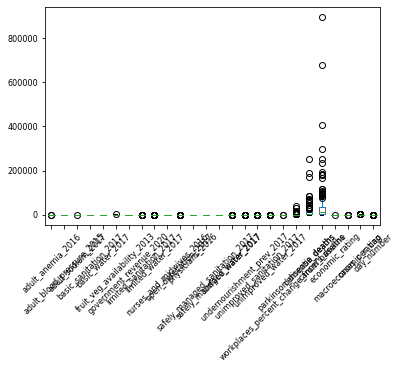

In [221]:
cols = list(df.columns.drop(['country', 'week_cat']))
df.boxplot(column=cols, grid = False, rot=45, fontsize=8)
plt.show()

 Above, we can see that the majority of the columns similar scaling, however, dementia_deaths and cancers_deaths have some extreme outliers.  We would also keep an eye on parkinson_disease_deaths as this column also appears to have outliers.  

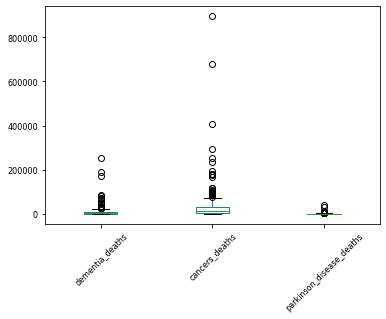

In [222]:
df.boxplot(column=['dementia_deaths', 'cancers_deaths', 'parkinson_disease_deaths'], grid=False, rot=45, fontsize=8)
plt.show()

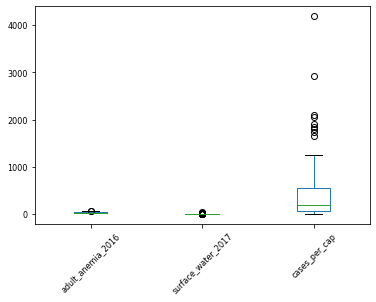

In [223]:
df.boxplot(column=['adult_anemia_2016', 'surface_water_2017', 'cases_per_cap'], grid=False, rot=45, fontsize=8)
plt.show()

Above are some subplots of different data from which we can more definatevely see that there are still some scaling issues throughout the data despite the previoius scaling.  Thus, we should work to rescale.  

The data herein is all important and a range is expected, so we do not want to remove outliers.  Thus, a min-max scaling approach may be utilized.

In [224]:
# scale the data by initializing min-max scaler and apply it to each column
df = df.set_index('country')
scaler = MinMaxScaler()
cols = list(df.columns)

for col in cols:
    scaler.fit(df[[col]])
    df[col] = scaler.transform(df[[col]])

### 4.5.2 Null Values and Outliers<a id='4.5.2_Null_Values_and_Outliers'></a>

In [225]:
df.describe()

,adult_anemia_2016,adult_blood_pressure_2015,adult_sodium_2017,basic_sanitation_2017,basic_water_2017,fruit_veg_availability_2013,government_revenue_2020,limited_sanitation_2017,limited_water_2017,nurses_and_midwives_2016,...,unimproved_water_2017,workplaces_percent_change_from_baseline,parkinson_disease_deaths,dementia_deaths,cancers_deaths,economic_rating,macroeconomic_rating,cases_per_cap,day_number,week_cat
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,...,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,0.315478,0.572780,0.357374,0.380317,0.397113,0.403723,0.222987,0.133672,0.100935,0.359352,...,0.139998,0.465955,0.050640,0.059061,0.056953,0.620937,0.666942,0.103210,0.237849,0.308540
std,0.206015,0.212846,0.182535,0.327737,0.375518,0.210219,0.204086,0.173870,0.186151,0.290270,...,0.221392,0.167530,0.126035,0.139777,0.130303,0.159932,0.175429,0.150530,0.185759,0.195625
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.157263,0.426894,0.235726,0.085900,0.021500,0.248742,0.026325,0.010954,0.000000,0.121576,...,0.001609,0.357657,0.004321,0.004643,0.005799,0.533334,0.600000,0.013768,0.136905,0.166667
50%,0.256303,0.580860,0.372757,0.290500,0.357200,0.410279,0.165730,0.046604,0.012295,0.281274,...,0.028645,0.444695,0.011122,0.011168,0.013965,0.575000,0.600000,0.045833,0.178571,0.333333
75%,0.404562,0.736376,0.494290,0.665700,0.666300,0.512155,0.429499,0.216491,0.104981,0.572594,...,0.169939,0.588531,0.032109,0.040765,0.036967,0.733334,0.800000,0.133437,0.261905,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Beyond seeing the scaling that we preformed earlier, `describe()` also lets us see that our counts are all 121 and thus there are no null values.  

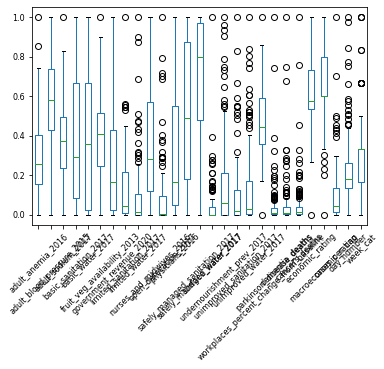

In [227]:
#cols = list(df.columns.drop('country'))
df.boxplot(column=cols, grid = False, rot=45, fontsize=8)
plt.show()

Above we see we do indeed have outliers, but we have previously confirmed that the outliers are each important so we want to keep them.

In [237]:
df.isna().sum()
#df[df.day_number.isna()]
#df[df.week_cat.isna()]

adult_anemia_2016                          0
adult_blood_pressure_2015                  0
adult_sodium_2017                          0
basic_sanitation_2017                      0
basic_water_2017                           0
fruit_veg_availability_2013                0
government_revenue_2020                    0
limited_sanitation_2017                    0
limited_water_2017                         0
nurses_and_midwives_2016                   0
open_defecation_2017                       0
physicians_2016                            0
safely_managed_sanitation_2017             0
safely_managed_water_2017                  0
surface_water_2017                         0
undernourishment_prev_2017                 0
unimproved_sanitation_2017                 0
unimproved_water_2017                      0
workplaces_percent_change_from_baseline    0
parkinson_disease_deaths                   0
dementia_deaths                            0
cancers_deaths                             0
economic_r

No null values are observed after scaling.

### 4.5.3 Predicted Variable Categorize<a id='4.5.3_Predicted_Variable_Categorize'></a>

In [232]:
df.drop('day_number', axis=1)
df.head()

,adult_anemia_2016,adult_blood_pressure_2015,adult_sodium_2017,basic_sanitation_2017,basic_water_2017,fruit_veg_availability_2013,government_revenue_2020,limited_sanitation_2017,limited_water_2017,nurses_and_midwives_2016,...,unimproved_water_2017,workplaces_percent_change_from_baseline,parkinson_disease_deaths,dementia_deaths,cancers_deaths,economic_rating,macroeconomic_rating,cases_per_cap,day_number,week_cat
country,,,,,,,,,,,,,,,,,,,,,
S. Korea,0.209484,0.000000,0.690049,0.0010,0.0157,0.651632,0.429499,0.000000,0.0,0.537520,...,0.006759,0.712248,0.082594,0.116989,0.099883,0.533334,0.6,0.008311,0.000000,0.000000
Japan,0.243697,0.291094,0.827896,0.0113,0.0056,0.344459,0.429499,0.000000,0.0,0.489396,...,0.031864,0.610094,0.389350,0.749451,0.455954,0.533334,0.6,0.011731,0.011905,0.166667
Italy,0.136855,0.451484,0.407830,0.0256,0.0440,0.640974,0.429499,0.001992,0.0,0.441272,...,0.018024,0.299351,0.195260,0.285276,0.203342,0.533334,0.6,0.103067,0.023810,0.166667
Germany,0.117047,0.394107,0.349103,0.0199,0.0020,0.412968,0.429499,0.015336,0.0,0.479337,...,0.000000,0.477568,0.324024,0.328664,0.279998,0.533334,0.6,0.067537,0.053571,0.166667
France,0.148860,0.490474,0.349918,0.1028,0.0215,0.492068,0.429499,0.026887,0.0,0.517401,...,0.000000,0.305599,0.195620,0.270141,0.201436,0.533334,0.6,0.090635,0.053571,0.166667


In [246]:
lab_enc = preprocessing.LabelEncoder()
df.week_cat = lab_enc.fit_transform(df.week_cat)
print(utils.multiclass.type_of_target(df.week_cat))

multiclass


## 4.6 Data Training<a id='4.6_Data_Training'></a>

### 4.6.1 Split Data and Initialize Model<a id='4.6.1_Split_Model'></a>

This set of data does not have categorical features, so we will not require dummy variables, however, this is generally an important step to consider.

In [247]:
#reset the index to get countries out of the way.  
#df = df.set_index('country')
X_cols = list(df.columns.drop('day_number'))
y_cols = list('day_number')

In [250]:
# remove target variable column from the dataframe, so only the predictor variables remain
X = df.drop(['day_number'], axis = 1)
y = df.week_cat
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

# initialize the model
model = LogisticRegression(random_state = 0)
model

LogisticRegression(random_state=0)

### 4.6.2 Fit Model<a id='4.6.2_Fit_Model'></a>

In [251]:
# fit linear model
model.fit(X_train, y_train)

C:\Users\gryka\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [252]:
print('Estimated intercept coefficient: {}'.format(model.intercept_))
print('Number of coefficients: {}'.format(len(model.coef_)))

Estimated intercept coefficient: [ 2.29232583  7.80880816  2.36953117 -0.49426026 -1.82859838 -4.33935739
 -5.80844913]
Number of coefficients: 7


### 4.6.3 Look at Preliminary Model<a id='4.6.3_Look_at_Preliminary_Model'></a>

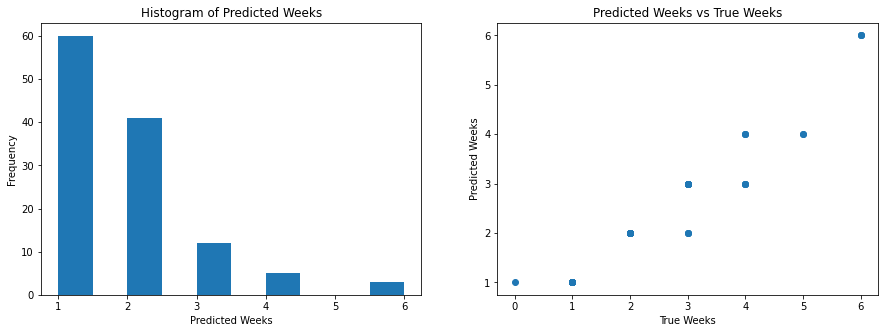

In [258]:
# Making subplots
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5));

# Plotting histograms of all the predicted days
ax1.hist(model.predict(X));

# Labelling axis and title
ax1.set_xlabel('Predicted Weeks')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Predicted Weeks')

# Plotting predicted days vs true days
ax2.scatter(x = df.week_cat, y = model.predict(X));

# Labelling axis and title
ax2.set_ylabel('Predicted Weeks')
ax2.set_xlabel('True Weeks')
ax2.set_title('Predicted Weeks vs True Weeks');

In [255]:
#Find the accuracy from the training data.
acc_scr = accuracy_score(model.predict(X_train), y_train) 
print('Accuracy Score: ', str(acc_scr))

Accuracy Score:  0.9166666666666666


## 4.7 Summary<a id='4.7_Summary'></a>

Herein, we preprocessed the data, split the data, and created an initial model.  

The initial accuracy score for categorizing day number was very low (only ~34%), but there wasa general trend during visualization of predicted vs true days.  It seems that the predicted days are predicted about 10 days too soon.  There is also a grouping of true days from around 50-60 that are predicted between 10-20 so these are being mis-predicted.  

After categorizing days into week categories, we get much better results, including a better trend and accuracy score.

Moving forward, we will improve the model to achieve better predictions.  In order to give ourselves a baseline for improvement of prediction, let's look at a dummy classification result.  

In [256]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent', random_state=0)
dummy.fit(X_train, y_train)
acc_scr = accuracy_score(dummy.predict(X_train), y_train)
print('Accuracy Score: ', str(acc_scr))

Accuracy Score:  0.46875


Based on the dummy score for day_number (~1%), we see that this model had a lot of work to do to classify accurately. After categorizing day number into week categories, the dummy score is up to 47%.  There is a good deal that a modeling can improve frome here.   

Below we will look at a confusion matrix to give us an idea of how to imporve our model in our next steps:

In [257]:
from sklearn.metrics import confusion_matrix

confusion_matrix(model.predict(X_test), y_test)

array([[14,  0,  0,  0,  0],
       [ 0,  8,  0,  0,  0],
       [ 0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1]], dtype=int64)

Initially, the confusion matrix results were not interpretable, so we re-categorized day_number into week_cat and get much better results.  